In [14]:
install.packages("pROC")
install.packages("vctrs")
install.packages("caret")
install.packages("nnet")
install.packages("ggplot2")
install.packages("cowplot")
install.packages("ggplot2")
install.packages("MASS")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages


Warning message:
"package 'MASS' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


In [98]:

all_table <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/fieldwork/subjective_and_objective_table.csv")

# Visualise MOS distribution

In [99]:
install.packages("ordinal")

Warning message:
"unable to access index for repository https://cran.r-project.org/src/contrib:
  cannot open URL 'https://cran.r-project.org/src/contrib/PACKAGES'"
Warning message:
"package 'ordinal' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"
Warning message:
"unable to access index for repository https://cran.r-project.org/bin/macosx/big-sur-arm64/contrib/4.3:
  cannot open URL 'https://cran.r-project.org/bin/macosx/big-sur-arm64/contrib/4.3/PACKAGES'"


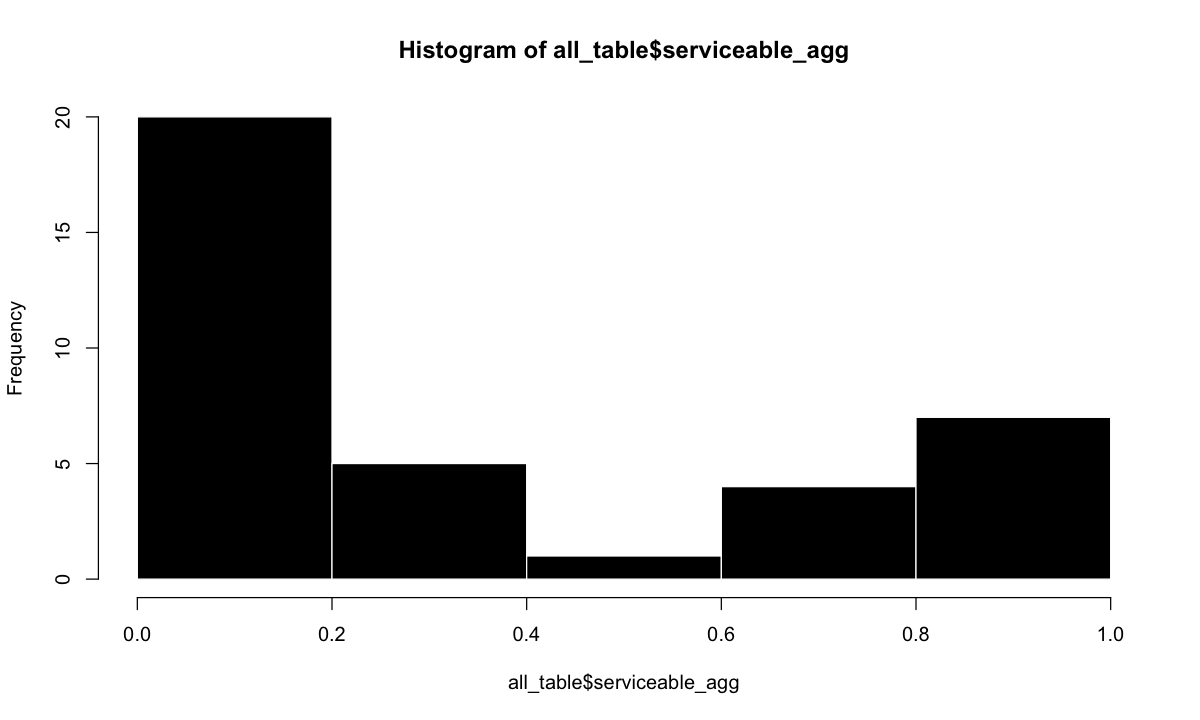

In [72]:
options(repr.plot.width = 10, repr.plot.height = 6)
#plot the target variable
par(bg = "white")  # set background color to white
hist(all_table$serviceable_agg,
     col = "black",
     border = "white")

## add a new ordinal variable that represents the levels of serviceable agg

In [102]:
library(ordinal)
all_table$rounded_serviceable_agg <- round(as.numeric(all_table$serviceable_agg), digits = 2)
all_table$ordered <- factor(all_table$rounded_serviceable_agg, 
levels =c(0.00,0.33, 0.5, 0.67, 1.00), 
ordered = TRUE)

### fit a big model with all vars to this ordinal var 

In [83]:
fit <- clm(ordered ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen
    + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya 
    + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen 
    + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya,
    #+ avg_down_google + avg_up_google + avg_rtt_google + sd_down_google + sd_up_google + sd_rtt_google, 
    data = all_table)
summary(fit)

formula: 
ordered ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya
data:    all_table

 link  threshold nobs logLik AIC    niter max.grad cond.H 
 logit flexible  37   -31.20 110.41 10(2) 3.13e-09 8.2e+06

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)  
avg_up_ellen     -0.16947    0.11935  -1.420   0.1556  
avg_down_ellen    0.06252    0.05823   1.074   0.2829  
avg_rtt_ellen    -0.20172    0.16688  -1.209   0.2267  
avg_ellen_jitter -0.13739    0.19852  -0.692   0.4889  
avg_pl_ellen      0.01536    0.20605   0.075   0.9406  
avg_up_aadya      0.12575    0.09925   1.267   0.2052  
avg_down_aadya   -0.08124    0.06953  -1.168   0.2426  
avg_rtt_aadya     0.05451    0.20134   0.271   0.7866  
avg_jit

### perform and plot the predictions

[1] 110.4062

[1] 149.0682

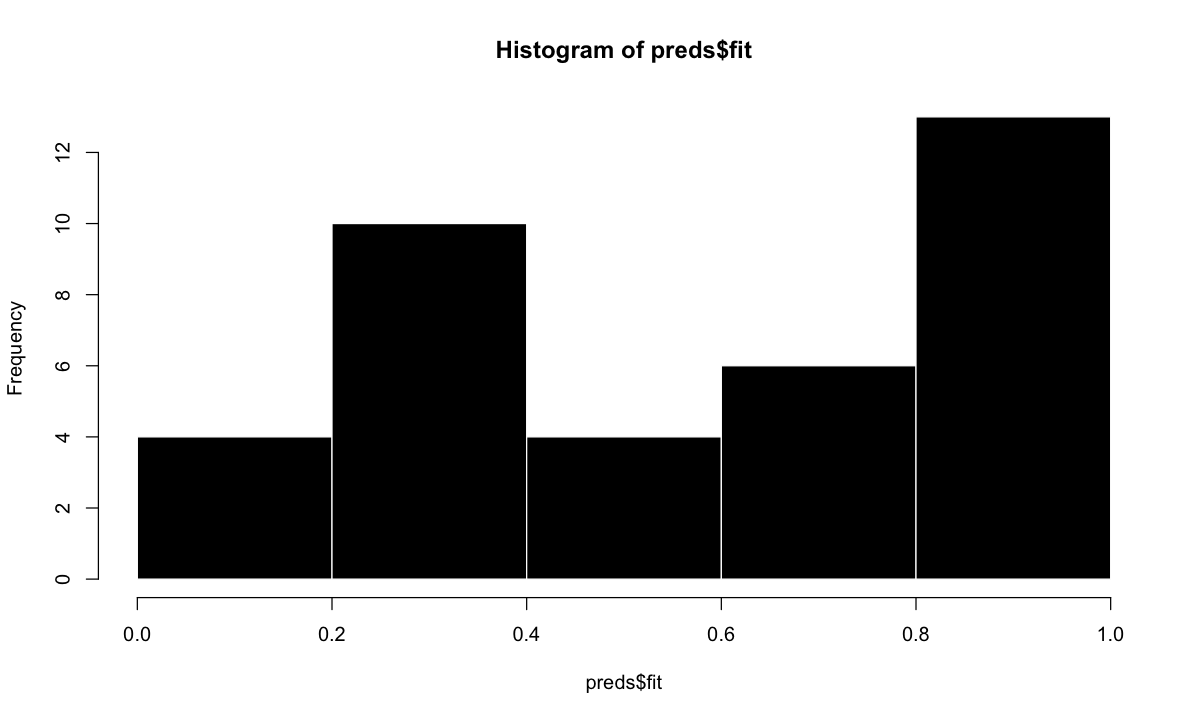

In [80]:
preds <- predict(fit, all_table)
AIC(fit)
BIC(fit)
options(repr.plot.width = 10, repr.plot.height = 6)
#plot the target variable
par(bg = "white")  # set background color to white
hist(preds$fit,
     col = "black",
     border = "white")


In [82]:
predicted_classes <- ifelse(preds$fit > 0.8, "1", "0")  # Example for binary outcome
table(predicted_classes, all_table$ordered)

                 
predicted_classes  0 0.33 0.5 0.67  1
                0 10    5   1    4  4
                1 10    0   0    0  3

Warning message in Ops.ordered(predict(fit, all_table), all_table$ordered):
"'-' is not meaningful for ordered factors"


[1] NA

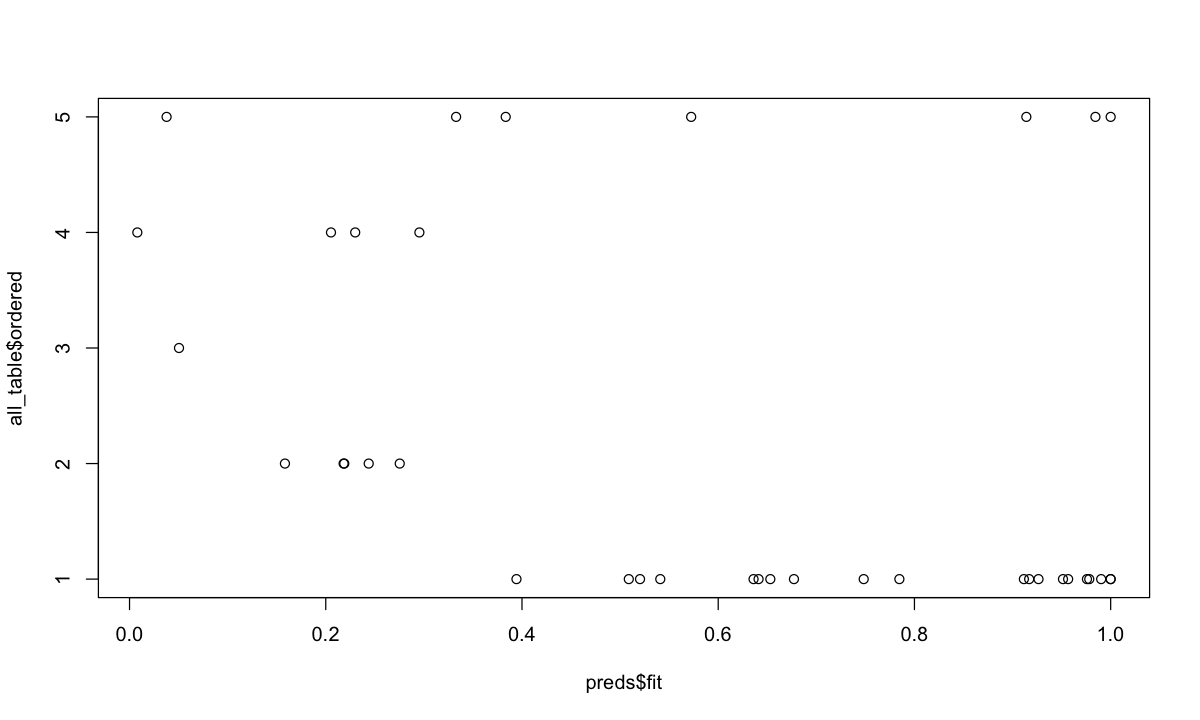

In [61]:
par(bg = "white")
preds <- predict(fit, all_table)
plot(preds$fit, all_table$ordered)

# Penalised regression 
### AIC

Start:  AIC=110.41
ordered ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya

                   Df    AIC
- avg_pl_ellen      1 108.41
- avg_rtt_aadya     1 108.48
- sd_jitter_aadya   1 108.53
- sd_pl_ellen       1 108.56
- avg_jitter_aadya  1 108.64
- sd_rtt_aadya      1 108.70
- avg_ellen_jitter  1 108.90
- sd_jitter_ellen   1 108.97
- avg_pl_aadya      1 109.28
- sd_rtt_ellen      1 109.46
- avg_down_ellen    1 109.61
- avg_down_aadya    1 109.93
- avg_rtt_ellen     1 109.94
- sd_down_aadya     1 110.05
- sd_pl_aadya       1 110.07
- sd_up_ellen       1 110.11
<none>                110.41
- avg_up_aadya      1 110.48
- sd_down_ellen     1 110.76
- avg_up_ellen      1 111.18
- sd_up_aadya       1 112

formula: ordered ~ avg_down_ellen + avg_rtt_ellen + avg_up_aadya
data:    all_table

 link  threshold nobs logLik AIC   niter max.grad cond.H 
 logit flexible  37   -35.91 85.82 7(2)  1.42e-12 5.4e+05

Coefficients:
               Estimate Std. Error z value Pr(>|z|)   
avg_down_ellen  0.02965    0.01936   1.531  0.12577   
avg_rtt_ellen  -0.11109    0.07299  -1.522  0.12801   
avg_up_aadya    0.11053    0.03802   2.907  0.00365 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Threshold coefficients:
         Estimate Std. Error z value
0|0.33    -0.4758     2.2469  -0.212
0.33|0.5   0.4156     2.2296   0.186
0.5|0.67   0.6101     2.2244   0.274
0.67|1     1.5568     2.2536   0.691

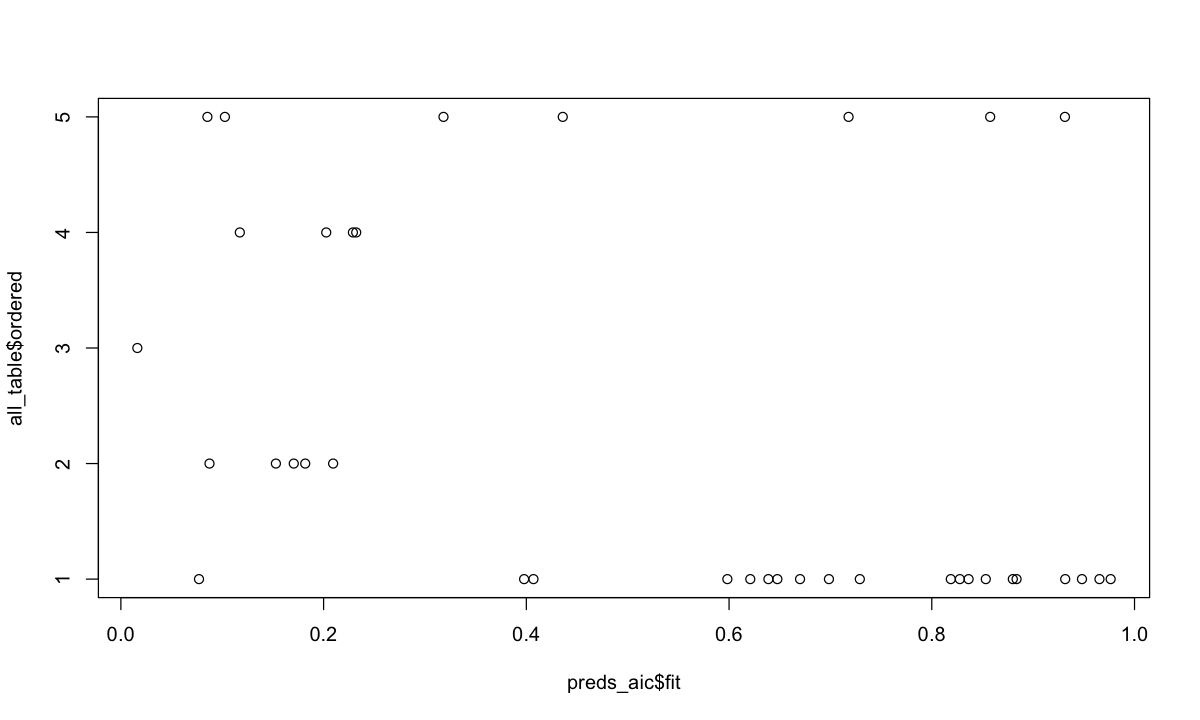

In [68]:
fit_aic <- step(fit) #stepwise regression to optimse a linear model
summary(fit_aic)
par(bg = "white")
preds_aic <-predict(fit_aic, all_table)
plot(preds_aic$fit, all_table$ordered)

### BIC

Start:  AIC=149.07
ordered ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya

                   Df    AIC
- avg_pl_ellen      1 145.46
- avg_rtt_aadya     1 145.53
- sd_jitter_aadya   1 145.58
- sd_pl_ellen       1 145.62
- avg_jitter_aadya  1 145.69
- sd_rtt_aadya      1 145.76
- avg_ellen_jitter  1 145.95
- sd_jitter_ellen   1 146.02
- avg_pl_aadya      1 146.33
- sd_rtt_ellen      1 146.51
- avg_down_ellen    1 146.67
- avg_down_aadya    1 146.98
- avg_rtt_ellen     1 146.99
- sd_down_aadya     1 147.10
- sd_pl_aadya       1 147.12
- sd_up_ellen       1 147.16
- avg_up_aadya      1 147.53
- sd_down_ellen     1 147.81
- avg_up_ellen      1 148.23
<none>                149.07
- sd_up_aadya       1 149

formula: ordered ~ avg_up_aadya
data:    all_table

 link  threshold nobs logLik AIC   niter max.grad cond.H 
 logit flexible  37   -38.29 86.58 6(2)  3.23e-10 4.2e+03

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
avg_up_aadya  0.12350    0.03504   3.525 0.000424 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Threshold coefficients:
         Estimate Std. Error z value
0|0.33     1.7134     0.5781   2.964
0.33|0.5   2.5040     0.6534   3.832
0.5|0.67   2.6832     0.6730   3.987
0.67|1     3.5967     0.8080   4.451

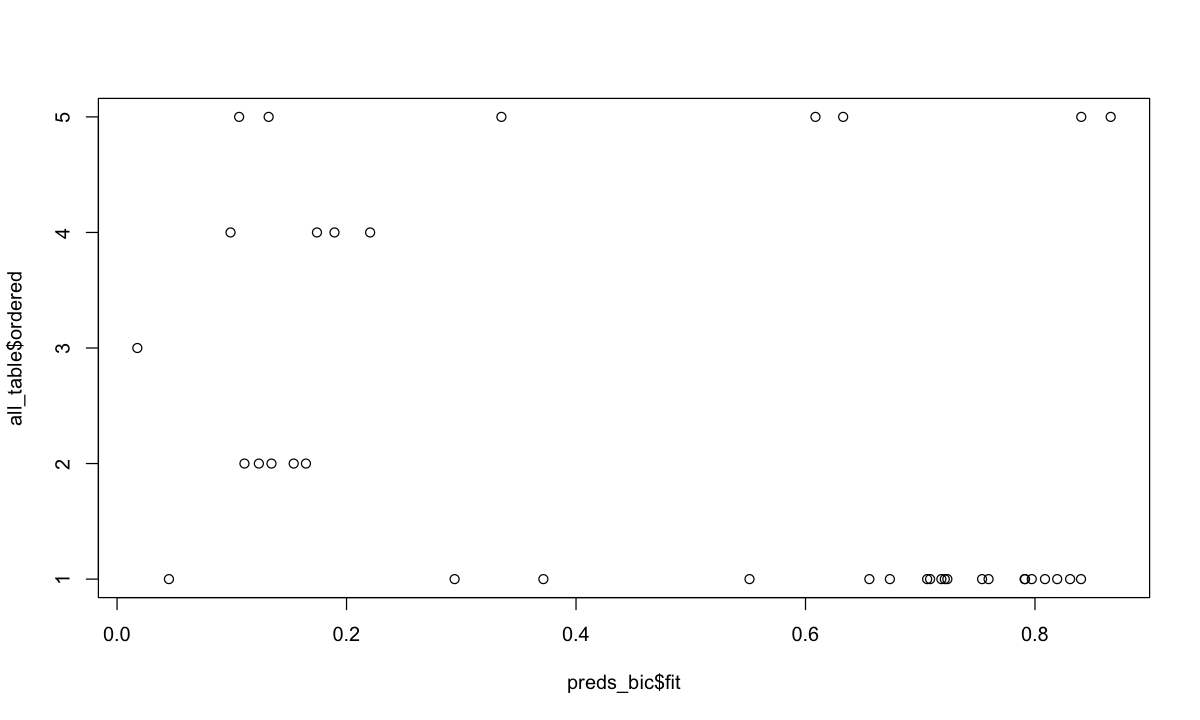

In [70]:
fit_bic <- step(fit, k = log(length(all_table$ordered)))
summary(fit_bic)
par(bg = "white")
par(bg = "white")
preds_bic <-predict(fit_bic, all_table)
plot(preds_bic$fit, all_table$ordered)

## regression with webRTC vars

In [114]:
subjective <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/fieldwork/subjective_table.csv")

In [115]:
web_stats <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression_2_(web_to_serviceable)/independent_vars_tables/fieldwork_independent_vars_table.csv")
#rename the id col in subjective to perform a merge
names(subjective)[names(subjective) == "identifier"] <- "ID"
#add the ordinal var to web_stats
web_stats <- merge(web_stats, subjective[, c("ID", "serviceable_agg")], by = "ID", all.x = TRUE)

In [117]:
fit_rtc <- glm(serviceable_agg ~ IT01V_packetsRecieved_ellen + IT01V_packetsRecieved_aadya + IT01V_packetsLost_ellen + IT01V_packetsLost_aadya + IT01V_frameWidth_ellen
+ IT01V_frameWidth_aadya + IT01V_frameHeight_ellen + IT01V_frameHeight_aadya + IT01V_totalFreezesDuration_ellen + IT01V_totalFreezesDuration_aadya + IT01V_framesPerSecond_ellen
+ IT01V_framesPerSecond_aadya + IT01V_bytesReceived_in_bits_s_ellen + IT01V_bytesReceived_in_bits_s_aadya + IT01V_totalProcessingDelay_ellen + IT01V_totalProcessingDelay_aadya
+ IT01V_jitter_ellen + IT01V_jitter_aadya + IT01V_jitterBufferDelay_emissions_ellen + IT01V_jitterBufferDelay_emissions_aadya + IT01A_bytesReceived_in_bits_s_ellen + IT01A_bytesReceived_in_bits_s_aadya 
+ IT01A_jitterBufferDelay_emissions_ellen + IT01A_jitterBufferDelay_emissions_aadya + OT01V_packetsSent_s_ellen + OT01V_packetsSent_s_aadya + OT01V_bytesSent_in_bits_s_ellen
+ OT01V_bytesSent_in_bits_s_aadya + OT01V_frameWidth_ellen + OT01V_frameWidth_aadya + OT01V_framesPerSecond_ellen + OT01V_framesPerSecond_aadya + OT01V_totalPacketSendDelay_ellen
+ OT01V_totalPacketSendDelay_aadya + OT01V_totalPacketSendDelay_packetsSent_in_ms_ellen + OT01V_totalPacketSendDelay_packetsSent_in_ms_aadya + RIV_roundTripTime_ellen + RIV_roundTripTime_aadya
+ RIV_fractionLost_ellen + RIV_fractionLost_aadya + RIA_fractionLost_ellen + RIA_fractionLost_aadya + RIA_roundTripTime_ellen + RIA_roundTripTime_aadya + ROA_roundTripTime_ellen + ROA_roundTripTime_aadya
+ AP_totalPlayoutDelay_ellen + AP_totalPlayoutDelay_aadya , data = web_stats, family = binomial)
summary(fit)

Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"


formula: 
ordered ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya
data:    all_table

 link  threshold nobs logLik AIC    niter max.grad cond.H 
 logit flexible  37   -31.20 110.41 10(2) 3.13e-09 8.2e+06

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)  
avg_up_ellen     -0.16947    0.11935  -1.420   0.1556  
avg_down_ellen    0.06252    0.05823   1.074   0.2829  
avg_rtt_ellen    -0.20172    0.16688  -1.209   0.2267  
avg_ellen_jitter -0.13739    0.19852  -0.692   0.4889  
avg_pl_ellen      0.01536    0.20605   0.075   0.9406  
avg_up_aadya      0.12575    0.09925   1.267   0.2052  
avg_down_aadya   -0.08124    0.06953  -1.168   0.2426  
avg_rtt_aadya     0.05451    0.20134   0.271   0.7866  
avg_jit